In [1]:
library("tximport")
library("readr")
library("DESeq2")
library("ggplot2")
library("pheatmap")
library("RColorBrewer")
library("biomaRt")
library("tidyverse")
library("pcaExplorer")
library('exprAnalysis')
library('org.Hs.eg.db')

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

In [2]:
dir <- getwd()
samples <- read_csv(file.path(dir, "samples.csv"))
files <- file.path(dir, samples$files.name)
names(files) <- paste0(samples$files.name)
files

Parsed with column specification:
cols(
  files.name = col_character(),
  condition = col_character(),
  sample = col_character()
)


FL_3d.genes.results 
"E:/work/mRNA-seq/Prof.JinMiRim/FL_3d.genes.results" 
                                 FL_1d.genes.results 
"E:/work/mRNA-seq/Prof.JinMiRim/FL_1d.genes.results" 
                                  N_3d.genes.results 
 "E:/work/mRNA-seq/Prof.JinMiRim/N_3d.genes.results" 
                                  N_1d.genes.results 
 "E:/work/mRNA-seq/Prof.JinMiRim/N_1d.genes.results"

In [22]:
modify_csv <- function(files.list) {
  for (i in files.list) {
    tmp <- read_tsv(i)
    tmp$effective_length[tmp$effective_length==0] <- 1
    write_tsv(tmp, i)
  }
}
modify_csv(files.list = files)

Parsed with column specification:
cols(
  gene_symbol = col_character(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_symbol = col_character(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_symbol = col_character(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_double(),
  effective_length = col_double(),
  expected_count = col_double(),
  TPM = col_double(),
  FPKM = col_double()
)
Parsed with column specification:
cols(
  gene_symbol = col_character(),
  gene_id = col_character(),
  `transcript_id(s)` = col_character(),
  length = col_

In [14]:
txi.rsem <- tximport(files, type = "rsem")

condition <- factor(samples$condition)

coldata <- data.frame(samples = samples$sample, condition=condition)

#rownames(coldata) <- names(files)
rownames(coldata) <- names(samples$sample)

ddsTxi <- DESeqDataSetFromTximport(txi.rsem, colData = coldata, design = ~condition)

colnames(ddsTxi) <- samples$sample

dds <- ddsTxi[ rowSums(counts(ddsTxi)) > 1, ]

dds$condition <-factor(dds$condition, levels=c("one", "three"))

deg.dds <- DESeq(dds)
res <- results(deg.dds, pAdjustMethod = "fdr", contrast=c("condition","one", "three"))

reading in files with read_tsv
1 2 3 4 
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [15]:
head(ddsTxi)

class: DESeqDataSet 
dim: 6 4 
metadata(1): version
assays(2): counts avgTxLength
rownames(6): ENSG00000000003 ENSG00000000005 ... ENSG00000000460
  ENSG00000000938
rowData names(0):
colnames(4): FL_3d FL_1d N_3d N_1d
colData names(2): samples condition

In [18]:
resLFC <- lfcShrink(deg.dds, coef=2, res=res)
resOrdered <- res[order(res$pvalue),]


rld <- rlog(deg.dds, blind=FALSE)
vsd <- varianceStabilizingTransformation(deg.dds, blind=FALSE)

sampleDists <- dist(t(assay(rld)))
#z <- plotPCA(rld, intgroup=c("condition"))
#plotPCA(rld, intgroup=c("condition"))
##p <- z  + theme_bw() +  #theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
#theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) + 
#theme(axis.text.y=element_text(size=12), axis.text.x=element_text(size=12))
#p
#ggsave("pca.png", device = "png")

Saving 6.67 x 6.67 in image


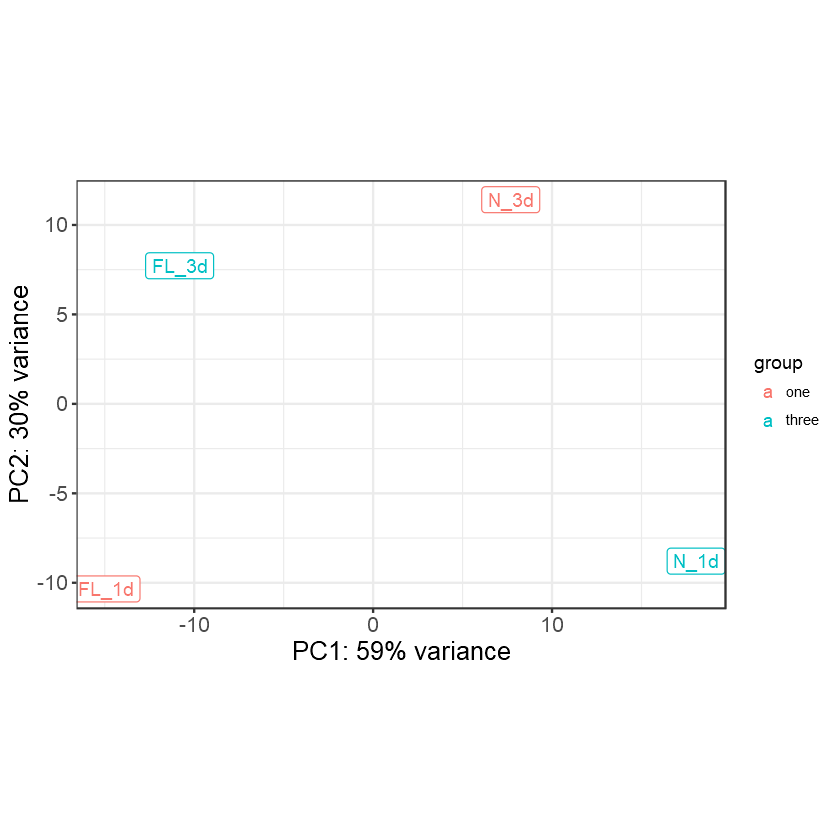

In [33]:
z <- plotPCA(rld, intgroup=c("condition"))
z <- z  + theme_bw() +  geom_label(aes(label = name))
p <- z  + theme_bw() +  #theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) + 
theme(axis.text.y=element_text(size=12), axis.text.x=element_text(size=12))
p
ggsave("pca.png", device = "png")

In [20]:
head(res)

log2 fold change (MLE): condition one vs three 
Wald test p-value: condition one vs three 
DataFrame with 6 rows and 6 columns
                  baseMean log2FoldChange     lfcSE          stat    pvalue
                 <numeric>      <numeric> <numeric>     <numeric> <numeric>
ENSG00000000003   21.56188  -0.1669127681 0.9314703 -0.1791928055 0.8577863
ENSG00000000005    1.00000  -0.0002203937 3.1105029 -0.0000708547 0.9999435
ENSG00000000419 1003.04030  -0.0539693073 0.5112191 -0.1055698200 0.9159237
ENSG00000000457 1195.36735   0.1642446721 0.4949582  0.3318354128 0.7400135
ENSG00000000460  375.61832  -0.3658157712 0.4735395 -0.7725137262 0.4398102
ENSG00000000938 7806.50794   0.1228983500 0.5135938  0.2392909752 0.8108800
                     padj
                <numeric>
ENSG00000000003         1
ENSG00000000005         1
ENSG00000000419         1
ENSG00000000457         1
ENSG00000000460         1
ENSG00000000938         1

In [22]:
tmp <- as.data.frame(res)
tmp %>% filter(tmp$pvalue <= 0.05) %>% summarise(n = n())

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

n
238


In [23]:
tmp %>% filter(tmp$pvalue <= 0.05) %>% head

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
100.57704,1.918806,0.9581780,2.002557,0.0452248521,1
349.99473,-1.548649,0.6968030,-2.222507,0.0262490811,1
75.65663,-3.775471,1.2473376,-3.026824,0.0024713808,1
49.20298,2.754046,0.7293624,3.775963,0.0001593905,1
65.92031,2.215072,0.9335231,2.372809,0.0176533923,1
1758.46077,-1.847606,0.9046372,-2.042372,0.0411145983,1


In [24]:
deg.anno <- geneAnnotations(input=tmp,
                               keys=row.names(tmp), 
                               column=c("ENTREZID", "SYMBOL"), 
                               keytype="ENSEMBL", organism="human")

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [25]:
head(deg.anno)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ENTREZID,SYMBOL
ENSG00000000003,21.56188,-0.1669127681,0.9314703,-0.1791928055,0.8577863,1,7105,TSPAN6
ENSG00000000005,1.00000,-0.0002203937,3.1105029,-0.0000708547,0.9999435,1,64102,TNMD
ENSG00000000419,1003.04030,-0.0539693073,0.5112191,-0.1055698200,0.9159237,1,8813,DPM1
ENSG00000000457,1195.36735,0.1642446721,0.4949582,0.3318354128,0.7400135,1,57147,SCYL3
ENSG00000000460,375.61832,-0.3658157712,0.4735395,-0.7725137262,0.4398102,1,55732,C1orf112
ENSG00000000938,7806.50794,0.1228983500,0.5135938,0.2392909752,0.8108800,1,2268,FGR


In [28]:
deg.anno <- dplyr::select(deg.anno, "SYMBOL", "ENTREZID", "log2FoldChange", "pvalue", 'padj', "baseMean", "lfcSE", "stat")
head(deg.anno)

,SYMBOL,ENTREZID,log2FoldChange,pvalue,padj,baseMean,lfcSE,stat
ENSG00000000003,TSPAN6,7105,-0.1669127681,0.8577863,1,21.56188,0.9314703,-0.1791928055
ENSG00000000005,TNMD,64102,-0.0002203937,0.9999435,1,1.00000,3.1105029,-0.0000708547
ENSG00000000419,DPM1,8813,-0.0539693073,0.9159237,1,1003.04030,0.5112191,-0.1055698200
ENSG00000000457,SCYL3,57147,0.1642446721,0.7400135,1,1195.36735,0.4949582,0.3318354128
ENSG00000000460,C1orf112,55732,-0.3658157712,0.4398102,1,375.61832,0.4735395,-0.7725137262
ENSG00000000938,FGR,2268,0.1228983500,0.8108800,1,7806.50794,0.5135938,0.2392909752


In [29]:
write.csv(deg.anno, file="one-vs-three.csv")

In [30]:
deg.anno$sig <- ifelse(deg.anno$pvalue < 0.05, "P-value<0.05", "Not Sig")
head(deg.anno)


,SYMBOL,ENTREZID,log2FoldChange,pvalue,padj,baseMean,lfcSE,stat,sig
ENSG00000000003,TSPAN6,7105,-0.1669127681,0.8577863,1,21.56188,0.9314703,-0.1791928055,Not Sig
ENSG00000000005,TNMD,64102,-0.0002203937,0.9999435,1,1.00000,3.1105029,-0.0000708547,Not Sig
ENSG00000000419,DPM1,8813,-0.0539693073,0.9159237,1,1003.04030,0.5112191,-0.1055698200,Not Sig
ENSG00000000457,SCYL3,57147,0.1642446721,0.7400135,1,1195.36735,0.4949582,0.3318354128,Not Sig
ENSG00000000460,C1orf112,55732,-0.3658157712,0.4398102,1,375.61832,0.4735395,-0.7725137262,Not Sig
ENSG00000000938,FGR,2268,0.1228983500,0.8108800,1,7806.50794,0.5135938,0.2392909752,Not Sig


Saving 6.67 x 6.67 in image


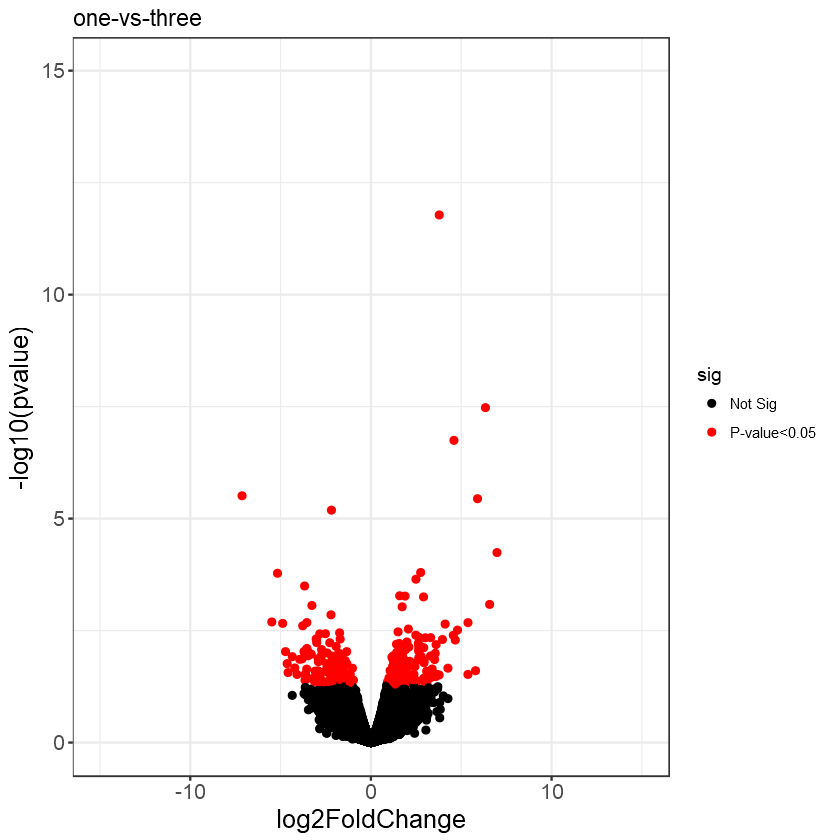

In [32]:
DEgenes_DESeq <- deg.anno[which(abs(deg.anno$log2FoldChange) >= log2(2) & deg.anno$pvalue < 0.05),]

p <- ggplot2::ggplot(deg.anno, ggplot2::aes(log2FoldChange, -log10(pvalue))) +
  ggplot2::geom_point(ggplot2::aes(col = sig)) +
  ggplot2::scale_color_manual(values = c("black", "red")) +
  ggplot2::ggtitle("one-vs-three") + ggplot2::theme_bw() + ggplot2::ylim(0,15) + ggplot2::xlim(-15,15) + 
  theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) + 
theme(axis.text.y=element_text(size=12), axis.text.x=element_text(size=12))

print(p)
ggsave("one-vs-three-volcano.plot.png")